# Kickstarter Projects Analysis
- - - 
### Author: [Ronald Gachoka](https://github.com/rongachoka)

## 1. Business Understanding

This project aims to analyze the relationship between backer engagement and project success. <br>
Investigate factors such as the number of backers, average pledge amounts and determine if there is any correlation between high backer engagement and project success.


## 2. Data Understanding

This phase is broken down into the following steps:
> - Data collection
> - Describing the data
> - Data exploration
> - Verify data quality

The data was collected from the Kickstarter Projects at https://www.mavenanalytics.io/data-playground 

#### Load Libraries

In [8]:
## Data

import numpy as np
import pandas as pd

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## Statistics
import scipy.stats as stats

## styling
plt.style.use("ggplot")

#### Data Collection

In [4]:
## Kickstarter_projects is loaded and stored in kickstarter_df

kickstarter_df = pd.read_csv("data/kickstarter_projects.csv")
kickstarter_details = pd.read_csv("data/kickstarter_projects_data_dictionary.csv")

## Shape of the dataframe

print("Shape of the dataframe: ", kickstarter_df.shape)
print("Shape of the dataframe: ", kickstarter_details.shape)
kickstarter_df.head()


Shape of the dataframe:  (374853, 11)
Shape of the dataframe:  (11, 2)


,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [5]:
kickstarter_details

,Field,Description
0,ID,Internal kickstarter id
1,Name,Name of the project
2,Category,Project category
3,Subcategory,Project subcategory
4,Country,Country the project is from
5,Launched,Date the project was launched
6,Deadline,Deadline date for crowdfunding
7,Goal,Amount of money the creator needs to complete ...
8,Pledged,Amount of money pledged by the crowd (USD)
9,Backers,Number of backers


The kickstarter_df has 374,853 rows and 11 columns <br>
The kickstarter_details has 11 rows and 2 columns

The kickstarter_details will be used along the kickstart_df to provide additional details to what each of the column means.

**Categorical columns (8)** <br>

- ID - Internal kickstarter id <br>
- Name - Name of the project <br>
- Category - Kickstarter project category <br>
- Subcategory - Kickstarter project subcategory <br>
- Country - Country the project is from <br>
- Launched - Date the project was launched <br>
- Deadline - Deadline date for crowdfunding <br>
- State - Current condition the project is in (as of 2018-01-02)

**Numerical columns (3)** <br>

- Goal - Amount of money the creator needs to complete the project (USD) <br>
- Pledged - Amount of money pledged by the crowd (USD) <br>
- Backers - Number of backers <br>

In [6]:
## Data Description

kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


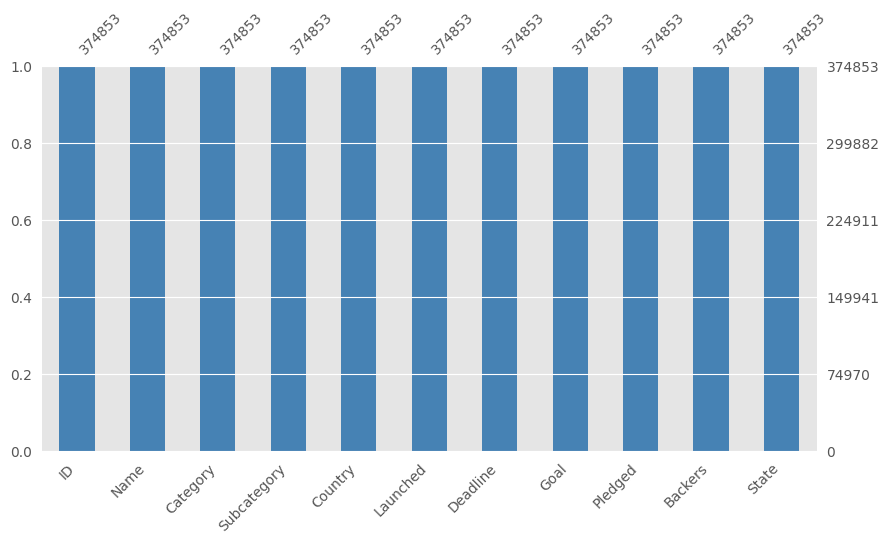

In [7]:
## Visualizing the missing values

msno.bar(kickstarter_df,color="steelblue", figsize = (10, 5), fontsize = 10);

- Initial overview of the data looks good as there are no missing values in any of the columns

### Data pre-processing

This part of the project will add in new columns needed for analysis as well as modify datatypes


In [37]:
## Changing data types

kickstarter_df["Deadline"] = pd.to_datetime(kickstarter_df["Deadline"])
kickstarter_df["Launched"] = pd.to_datetime(kickstarter_df["Launched"])
kickstarter_df["ID"] = kickstarter_df["ID"].astype("object")

## Creating new columns

kickstarter_df["Project_Duration"] = (kickstarter_df["Deadline"] - kickstarter_df["Launched"]).dt.days

kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372061 entries, 0 to 374852
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                372061 non-null  object        
 1   Name              372061 non-null  object        
 2   Category          372061 non-null  object        
 3   Subcategory       372061 non-null  object        
 4   Country           372061 non-null  object        
 5   Launched          372061 non-null  datetime64[ns]
 6   Deadline          372061 non-null  datetime64[ns]
 7   Goal              372061 non-null  int64         
 8   Pledged           372061 non-null  int64         
 9   Backers           372061 non-null  int64         
 10  State             372061 non-null  object        
 11  Project_Duration  372061 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 36.9+ MB


### Column analysis

This section will explore each column to see their distributions as well any additional insights that can be drawn

**2.1 ID**

> - Unique Kickstarter project ID

In [17]:
## Checking for duplicates

kickstarter_df["ID"].duplicated().sum()

0

There are no duplicated ID's in this dataset 

**2.2 Name**
> - Kickstarter project name

In [26]:
## Checking for duplicates

kickstarter_df["Name"].duplicated().sum()

duplicate_names = kickstarter_df["Name"].value_counts()
duplicate_names = duplicate_names[duplicate_names > 1]

print(duplicate_names[:10])

Name
New EP/Music Development      13
Canceled (Canceled)           13
N/A (Canceled)                11
Music Video                   11
Cancelled (Canceled)          10
New EP / Music Development    10
The Journey                    9
Reflections                    9
Debut Album                    9
A Midsummer Night's Dream      8
Name: count, dtype: int64


In [20]:
## Validating some of the duplicates

kickstarter_df[kickstarter_df["Name"] == "New EP/Music Development"][:5]

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Project_Duration
209493,1722909259,New EP/Music Development,Music,Metal,United States,2015-03-18 16:10:38,2015-04-22,3000,123,6,Failed,34
209496,1068645001,New EP/Music Development,Music,Rock,United States,2015-03-18 16:20:34,2015-04-23,3500,1,1,Failed,35
209504,191370364,New EP/Music Development,Music,Metal,United States,2015-03-18 16:40:13,2015-04-22,3000,367,8,Failed,34
209508,871571287,New EP/Music Development,Music,Rock,United States,2015-03-18 16:58:43,2015-04-23,2500,56,3,Failed,35
209513,714957298,New EP/Music Development,Music,Rock,United States,2015-03-18 17:20:08,2015-04-23,3500,1,1,Failed,35


In [21]:
kickstarter_df[kickstarter_df["Name"] == "The Journey"][:5]

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Project_Duration
90343,855901312,The Journey,Film & Video,Documentary,United Kingdom,2013-04-04 16:00:02,2013-06-03,124609,67511,219,Failed,59
132254,948450785,The Journey,Film & Video,Documentary,United States,2014-03-06 22:40:05,2014-03-27,15000,181,9,Failed,20
147668,204201491,The Journey,Journalism,Photo,United States,2014-06-16 20:36:47,2014-07-16,12500,5,1,Failed,29
158562,1417896019,The Journey,Art,Installations,United Kingdom,2014-07-24 18:19:56,2014-08-10,1001,67,3,Failed,16
196743,1757487848,The Journey,Film & Video,Television,United States,2015-01-28 17:37:59,2015-02-27,22000,40357,253,Successful,29


The duplicated names may cause some confusion but it seems like they are either part of a larger project as seen in "New EP/Music Development". Similary when looking at the second case involving "The Journey", it follows a similar case where it looks like it may be a similar project just subsets of it with different timelines.


In [28]:
## Unique values in the name column

print("Number of unique names: ", kickstarter_df["Name"].nunique())
print("Number of duplicate names: ", len(duplicate_names))

## Dropping duplicates

kickstarter_df.drop_duplicates(subset = "Name", keep = "first", inplace = True)

## Checking for duplicates

kickstarter_df["Name"].duplicated().sum()

Number of unique names:  372061
Number of duplicate names:  2188


0

**2.3 Category**

> - Kickstarter project category

In [36]:
## Number of categories

print("Number of categories: ", kickstarter_df["Category"].nunique())

## Propotion of categories

kickstarter_df["Category"].value_counts(normalize = True) * 100


Number of categories:  15


Category
Film & Video    16.620662
Music           13.239227
Publishing      10.520049
Games            9.360831
Technology       8.707981
Design           8.045186
Art              7.523497
Food             6.569084
Fashion          6.114051
Theater          2.898449
Comics           2.887699
Photography      2.875335
Crafts           2.357947
Journalism       1.272372
Dance            1.007630
Name: proportion, dtype: float64

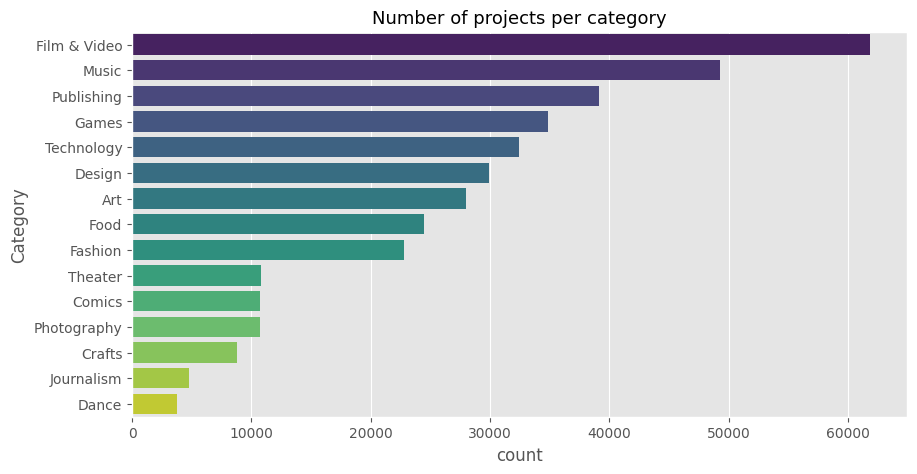

In [35]:
## Visualizing the categories

plt.figure(figsize = (10, 5))
sns.countplot(y = kickstarter_df["Category"], 
              order = kickstarter_df["Category"].value_counts().index, 
              palette = "viridis");
plt.title("Number of projects per category", fontsize = 13);

The distribution above shows that most of the kickstarter projects are "Film & Video" which accounts for 16% of the projects followd by "Music" at 13%

**2.4 Sub-category**
> - Which subcategory the kickstarter project belongs to

In [64]:
## Number of sub-categories in each category

kickstarter_df.groupby("Category")["Subcategory"].nunique().sort_values(ascending = False)

## Visualizing the number of sub-categories per category

plt.figure(figsize = (10, 5))
sns.countplot(data = kickstarter_df["Category"],
              y = kickstarter_df["Subcategory"].value_counts(),
              order = kickstarter_df["Subcategory"].value_counts().index,
              palette = "viridis");

              

KeyboardInterrupt: 